## Data Preprocessing

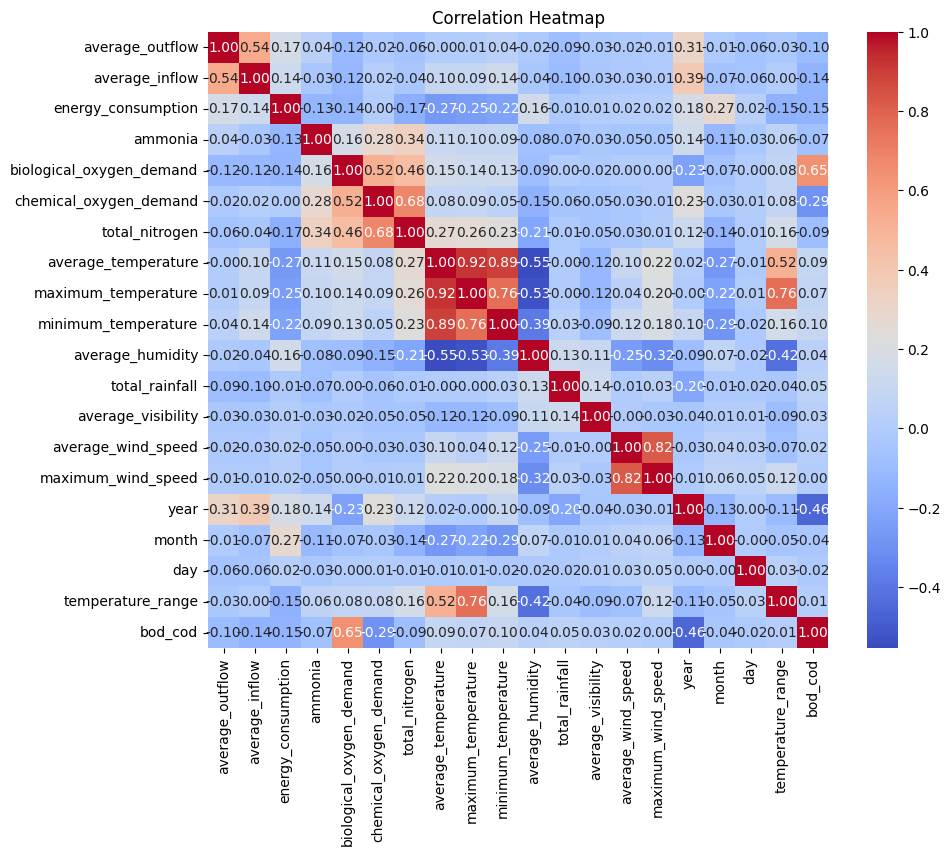

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
file_path = "Data-Melbourne_F_Fixed.csv"
df = pd.read_csv(file_path)

# Rename columns for convenience (if necessary)
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

##check for null values
df.isnull().sum()

##statiscal values
df.describe()

# Drop irrelevant columns
df.drop(['serial_no.', 'atmospheric_pressure'], axis=1, inplace=True)

# Feature engineering
df['temperature_range'] = df['maximum_temperature'] - df['minimum_temperature']
df['bod_cod'] = df['biological_oxygen_demand'] / df['chemical_oxygen_demand']

# Converting Wh to MWh
df['energy_consumption'] = round(df['energy_consumption'] / 1000, 1)

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Split the dataset into features and target
X = df.drop('biological_oxygen_demand', axis=1)
y = df['biological_oxygen_demand']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
df.describe()

,average_outflow,average_inflow,energy_consumption,ammonia,biological_oxygen_demand,chemical_oxygen_demand,total_nitrogen,average_temperature,maximum_temperature,minimum_temperature,average_humidity,total_rainfall,average_visibility,average_wind_speed,maximum_wind_speed,year,month,day,temperature_range,bod_cod
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275.159479,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660,10.493560,0.455988
std,1.228778,1.439583,44.639574,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422,4.674615,0.088025
min,0.000004,2.589000,116.600000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,-17.000000,0.160000
25%,3.074500,3.643250,246.425000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000,7.100000,0.391304
50%,3.701000,4.161500,275.800000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000,10.000000,0.472066
75%,4.498750,4.847750,305.675000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000,13.000000,0.500000
max,7.920000,18.968000,398.300000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000,28.200000,0.953846


## Logistic regression 

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Copying the dataset
new_df = df.copy()

# Calculate BOD threshold
bod_threshold = new_df['biological_oxygen_demand'].mean()

# Create the target variable
new_df['target_bod'] = new_df['biological_oxygen_demand'].apply(lambda x: 1 if x > bod_threshold else 0)

# Set X and y
x_bod = new_df.drop(['target_bod', 'biological_oxygen_demand'], axis=1)
y_bod = new_df['target_bod']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_bod, y_bod, random_state=42, test_size=0.2)

# Normalize the data
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

# Manual Logistic Regression Class
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        self.cost_history = []

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradient Descent
            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Compute the cost
            cost = -(1 / self.m) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            self.cost_history.append(cost)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Training Logistic Regression from scratch
lr_scratch = LogisticRegressionScratch(lr=0.01, epochs=1000)
lr_scratch.fit(x_train_scaled, y_train)

# Predicting
y_pred_scratch = lr_scratch.predict(x_test_scaled)

# Evaluating
print("Manual Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("F1 Score:", f1_score(y_test, y_pred_scratch))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_scratch))

# Logistic Regression (sklearn)
from sklearn.linear_model import LogisticRegression

lr_sklearn = LogisticRegression()
lr_sklearn.fit(x_train_scaled, y_train)
y_pred_sklearn = lr_sklearn.predict(x_test_scaled)

# Evaluating sklearn Logistic Regression
print("\nSklearn Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("F1 Score:", f1_score(y_test, y_pred_sklearn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sklearn))


Manual Logistic Regression
Accuracy: 0.8953068592057761
F1 Score: 0.8687782805429864
Confusion Matrix:
 [[152  12]
 [ 17  96]]

Sklearn Logistic Regression
Accuracy: 0.9675090252707581
F1 Score: 0.96
Confusion Matrix:
 [[160   4]
 [  5 108]]


## K-Nearest Neighbours

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)

# Accuracy and F1 Score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Classification Report
print("\n--- K-Nearest Neighbors (KNN) ---")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))




--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.8014
F1 Score: 0.7264
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       164
           1       0.83      0.65      0.73       113

    accuracy                           0.80       277
   macro avg       0.81      0.78      0.79       277
weighted avg       0.81      0.80      0.80       277

Confusion Matrix:
 [[149  15]
 [ 40  73]]


## Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Decision Tree Model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

# Accuracy and F1 Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Classification Report
print("\n--- Decision Tree Classifier ---")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))



--- Decision Tree Classifier ---
Accuracy: 0.9603
F1 Score: 0.9515
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       164
           1       0.95      0.96      0.95       113

    accuracy                           0.96       277
   macro avg       0.96      0.96      0.96       277
weighted avg       0.96      0.96      0.96       277

Confusion Matrix:
 [[158   6]
 [  5 108]]


## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# Accuracy and F1 Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Classification Report
print("\n--- Random Forest Classifier ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



--- Random Forest Classifier ---
Accuracy: 0.9495
F1 Score: 0.9346
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       164
           1       0.99      0.88      0.93       113

    accuracy                           0.95       277
   macro avg       0.96      0.94      0.95       277
weighted avg       0.95      0.95      0.95       277

Confusion Matrix:
 [[163   1]
 [ 13 100]]


## Support Vector Machine

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# SVM Model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x_train_scaled, y_train)
y_pred_svm = svm.predict(x_test_scaled)

# Accuracy and F1 Score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Classification Report
print("\n--- Support Vector Machine (SVM) ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



--- Support Vector Machine (SVM) ---
Accuracy: 0.9747
F1 Score: 0.9692
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       164
           1       0.96      0.97      0.97       113

    accuracy                           0.97       277
   macro avg       0.97      0.97      0.97       277
weighted avg       0.97      0.97      0.97       277

Confusion Matrix:
 [[160   4]
 [  3 110]]


## Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Model Evaluation Function
def evaluate_models(models, x_test, y_test, x_test_scaled=None):
    for name, model, is_scaled in models:
        if is_scaled:  # Use scaled data if required
            y_pred = model.predict(x_test_scaled)
        else:
            y_pred = model.predict(x_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        print(f"\n--- {name} ---")
        print(f"Accuracy: {accuracy:.8f}")
        print(f"F1 Score: {f1:.8f}")
        # print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        print(f"Confusion Matrix:\n{cm}")

# Define models and whether they use scaled data
models_to_evaluate = [
    ("Logistic Regression Scratch", lr_scratch, True),
    ("Logistic Regression (sklearn)", lr_sklearn, True),
    ("KNN", knn, True),
    ("Decision Tree", dt, False),
    ("Random Forest", rf, False),
    ("SVM", svm, True)
]

# Call the evaluation function
evaluate_models(models_to_evaluate, x_test, y_test, x_test_scaled)



--- Logistic Regression Scratch ---
Accuracy: 0.89530686
F1 Score: 0.86877828
Confusion Matrix:
[[152  12]
 [ 17  96]]

--- Logistic Regression (sklearn) ---
Accuracy: 0.96750903
F1 Score: 0.96000000
Confusion Matrix:
[[160   4]
 [  5 108]]

--- KNN ---
Accuracy: 0.80144404
F1 Score: 0.72636816
Confusion Matrix:
[[149  15]
 [ 40  73]]

--- Decision Tree ---
Accuracy: 0.96028881
F1 Score: 0.95154185
Confusion Matrix:
[[158   6]
 [  5 108]]

--- Random Forest ---
Accuracy: 0.94945848
F1 Score: 0.93457944
Confusion Matrix:
[[163   1]
 [ 13 100]]

--- SVM ---
Accuracy: 0.97472924
F1 Score: 0.96916300
Confusion Matrix:
[[160   4]
 [  3 110]]


## Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga']
}


In [27]:
# GridSearchCV for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(x_train_scaled, y_train)

# GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train, y_train)

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train, y_train)

# GridSearchCV for SVM
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(x_train_scaled, y_train)

# GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(x_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [28]:
print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best cross-validation score for KNN:", knn_grid_search.best_score_)

print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best cross-validation score for Decision Tree:", dt_grid_search.best_score_)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation score for Random Forest:", rf_grid_search.best_score_)

print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best cross-validation score for SVM:", svm_grid_search.best_score_)

print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best cross-validation score for Logistic Regression:", lr_grid_search.best_score_)


Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation score for KNN: 0.8280542986425339
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score for Decision Tree: 0.9665158371040725
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.9547511312217194
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVM: 0.9737556561085972
Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.9710407239819003
